## Python for REU 2021

_Burt Rosenberg, 18 May 2021_


## The Numpy Library

Python is being used increasingly as a language for scientific computing because of its qualities as a programing language and because of community developed libraries extending the langauges abilities. One concern with using a powerful language like Python is that it loses the efficiency of languages which run "closer to the metal", although the analogy should be "closer to the silicon". For instance, programs written in C can be very efficient to run but they are not efficient to code. C codes slowly and requires extreme attention to detail.

The SciPy initiative attempts to solve this efficiency gap, and present powerful, efficient libraries of Python code for scientific programing. Some of these libraries are written in C to truely extend the way the language represents and manipulates data. These abilities are brought into your programs using an _import_ statement, naming a package or module that contains definitions. These then become avaiable for use in your program.

SciPy includes NumPy for numeric arrays, MatPlotLib for making graphs, and Pandas for tabularizing and cleaning data. In this page we talk about NumPy. The entire scipy library is described at [scipy.org](https://www.scipy.org/docs.html). One might also look at the [scipy-lectures](http://www.scipy-lectures.org/index.html) tutoral.

### Numpy features


NumPy introduces the class _ndarray_, a multi-dimensional array of numbers. The ndarray improves on the list for efficiency and the collection methods it supports. That includes the notion of _universal functions_ and _broadcasting_. These concepts and methods make it very intuitive to us arrays for scientific computation. 
 
 
Numpy arrays support:

* Element-wise operations;
* Indexing operations based on strides;
* No-copy views when reshaping, when possible;
* Fast arrays based on a direct C-like representation;
* Broadcasting;
* Ufuncts for arithmetic, logical, and common functions;
* Masking and fancy indexing

See the scipy.org numpy-1.12.0 [reference](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.html)






In [1]:
## the import's

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Example: constructing


In [2]:


#np.ones??
#np.zeros??

## How to make NDarrays

## Technique the first - intrinsic builders
a = np.zeros(12)
print(a)
a = np.ones(12)
print(a)


## Technique the second - from a list
x_list = [i for i in range(12)]
x = np.array(x_list, dtype=np.float64)
print(x)

## Technique the third - reference functions
x = np.arange(0.0, 5.0, 0.02)
print(f'array x has {len(x)} elements, the first 10 are {x[:10]}')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
array x has 250 elements, the first 10 are [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]


In [3]:
## the shape or things

a = np.zeros(12)
print(a, a.shape)
a.shape = (3,4)
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (12,)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Example:  broadcasting

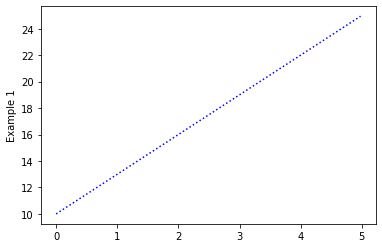

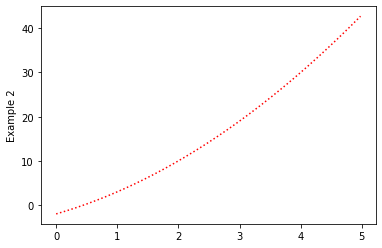

In [4]:

# they work like vectors

y = 3.0 * x + 10.0

plt.plot(x, y, 'b:')
plt.ylabel("Example 1")
plt.show()


y = x**2 + 4*x - 2.0

plt.plot(x, y, 'r:')
plt.ylabel("Example 2")
plt.show()

### Example:  Ufuncts

There are also special versions of math functions that can be applied in parallel to the ndarray, see [Math Routines](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.math.html)

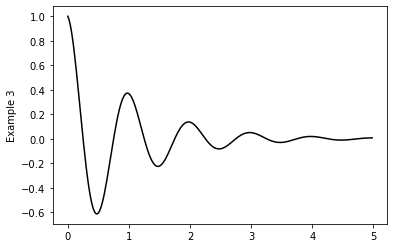

In [5]:
def f(t):
     return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.02)
plt.plot(t1, f(t1), 'k')
plt.ylabel("Example 3")
plt.show()

## Timing Results

In [6]:
import math


# in this corner .... lists!
a_list = [0.0 for i in range(1000000)]
b_list = [ 1.0 for i in range(1000000)]

# and in this corner, the challenger, ndarray!
a_ndarray = np.ones(1000000)
b_ndarray = np.zeros(1000000)


def arithmetic_looping(a,b):
        for i in range(len(a)):
                a[i] + b[i]
        return a
    
def arithmetic_ufunc(a,b):
    return a+b

print("\narithmetic using looping over a list")
%time arithmetic_looping(a_list,b_list)

print("\narithmetic  using looping over ndarray")
%time arithmetic_ufunc(a_ndarray,b_ndarray)

True


arithmetic using looping over a list
CPU times: user 81.5 ms, sys: 851 µs, total: 82.3 ms
Wall time: 83.3 ms

arithmetic  using looping over ndarray
CPU times: user 3.58 ms, sys: 3.67 ms, total: 7.24 ms
Wall time: 7 ms


True

In [7]:

def logical_looping(a,b):
        t = True
        for i in range(len(a)):
                t = t and (a[i]>b[i])
        return t
    
def logical_ufunc(a,b):
    return np.all(a>b)



print("\nlogical using looping over ndarray")
%time logical_looping(a_list,b_list)
print("\nlogical using ufunc")
%time logical_ufunc(a_ndarray,b_ndarray)


def applysin_looping(s):
    for f in s:
        math.sin(f)

def applysin_ufunc(s):
    np.sin(s)  # note it is not math.sin, but np.sin


mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000000)

print("\nmath.sin and looping over ndarray")
%time applysin_looping(s)
print("\nnp.sin and ufunc's")
%time applysin_ufunc(s)




logical using looping over ndarray
CPU times: user 35.3 ms, sys: 1.67 ms, total: 36.9 ms
Wall time: 37.7 ms

logical using ufunc
CPU times: user 2.27 ms, sys: 440 µs, total: 2.71 ms
Wall time: 2.05 ms

math.sin and looping over ndarray
CPU times: user 164 ms, sys: 1.54 ms, total: 165 ms
Wall time: 168 ms

np.sin and ufunc's
CPU times: user 8.64 ms, sys: 2.55 ms, total: 11.2 ms
Wall time: 11 ms


## Exercise: Linear Regression

Given a two sets of observations over $n$ events, the Pearson R is a number between -1 and 1 summarizing the linear correlation between the two events. Numpy gives functions to compute all sorts of statistics, but for the purposes of this exercise, we only care about the linear algebra numpy function `np.dot` and `np.sum`.

The linear regression formula is a quick consequence of the Pearson R.


For some linear algebra routines see [Numpy Linear Algebra Reference](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.linalg.html)
For routines to do this directly see [Numpy Statistics Reference](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.statistics.html).


### Implementing class MyLinReg

The class MyLinReg includes static methods for various statistical formulas including the Pearson R, and a function returning the linear regression.

A static method is invoked as ClassName.function_name(). It does not have a self parameter. It can be called on an non-instanced of a class. It is a namespace. I think application, it is just a convenient way to collect together def's under a single namespace.

Look on the web for the usual definitions of the statistical functions. A simple presentation of linear regression as a consequence of the Pearson R is the given in the course Basic Statistics from the University of Amsterdam, [week 2](https://www.coursera.org/learn/basic-statistics/home/week/2).


#### Formula for Linear Regression

The formula is to calculate the parameters in `y = m x + b`. Covary both sides by `x`,

$$
  (y,x) = (m \, x + b, x) = m (x,x) + (b,x) = m (x,x) + 0
$$

or

$$
   m =  \frac{\mbox{COV}(y,x)}{ \mbox{VAR} (x) }= \frac{\mbox{SD}(y)}{ \mbox{SD}(x)} \;\;\frac { \mbox{COV}(y,x) }{\mbox{SD}(y) \;\mbox{SD}(x)} = \frac{\mbox{SD}(y) \;\mbox{PEARSON}(x,y)}{ \mbox{SD}(x)}
$$

and the intercept by taking the mean,

$$
E(y) = E( m \,x + b ) = m \,E(x) + b
$$

or 

$$
b = E(y) - m \,E(x)
$$


### Test: Chocolate consumption

Test on the example from week 2 of the Basic Statistics course.

The data is,

<pre>
x = np.array([50,100,200,300],dtype=np.float64)
y = np.array([50,70,70,95],dtype=np.float64)
</pre>

The answer is, 

<pre>
mean x = 162.5, std x = 110.86778913041725
mean y = 71.25, std x = 18.427786989579985
pearson = 0.9279436074843682
the regression slope = 0.15423728813559323, the regression intercept = -46.186440677966104
</pre>


### Test: Recovering parameter from noisey data

The define `prepare_the_noisey` returns simulated noisey data based on given model parameters, `m` and `b`, summed with Gaussian noise of width `r`. The linear regression should recover the model parameters.



In [8]:
#
# topics -
#    static methods
#    class name space

class MyLinReg:
    
    @staticmethod
    def mean(nd_a):
        """
        return the mean of the ndarray given
        """
        return 0.0

    @staticmethod
    def covar(nd_a,nd_b):
        """
        return the covariance between the two ndarrays given
        asssume the mean is a sample mean, and therefore the denominator
        for calculating the convariance is one less then the number 
        of data points.
        """
        assert len(nd_a)==len(nd_b)
        return 0.0

    @staticmethod
    def var(nd_a):
        """
        return the variance of the ndarray given
        """
        return 0.0

    @staticmethod
    def stddev(nd_a):
        """
        return the standard deviation of the ndarray given
        """
        return 0.0
    
    @staticmethod
    def pearson(nd_a,nd_b):
        """
        return the Pearson R between the two ndarrays given
        """
        return 0.0

    @staticmethod
    def linear_regression(x,y):
        """
        do the linear regression between the two ndarrays given and 
        return a tuple with the slope, intercept, and a lambda 
        implementing the linear transformation of the regression.
        """
        m = 0.0
        b = 0.0
        rl = lambda x: m*x + b
        return(m,b,rl)


mean x = 0.0, std x = 0.0
mean y = 0.0, std x = 0.0
pearson = 0.0
the regression slope = 0.0, the regression intercept = 0.0


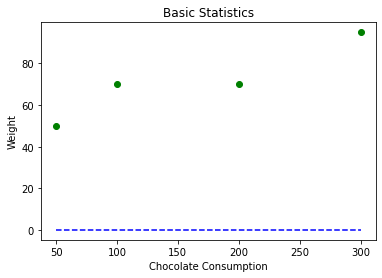

In [9]:
## test case
## this is from the Coursera Basic Statistic course, University of Amsterdam

x = np.array([50,100,200,300],dtype=np.float64)
y = np.array([50,70,70,95],dtype=np.float64)
m, b, regression_line = MyLinReg.linear_regression(x,y)

print(f'mean x = {MyLinReg.mean(x)}, std x = {MyLinReg.stddev(x)}')
print(f'mean y = {MyLinReg.mean(y)}, std x = {MyLinReg.stddev(y)}')
print(f'pearson = {MyLinReg.pearson(x,y)}')
print(f'the regression slope = {m}, the regression intercept = {b}')

plt.scatter(x,y,c='g')
plt.plot(x,regression_line(x),'b--',)
plt.xlabel("Chocolate Consumption")
plt.ylabel("Weight")
plt.title("Basic Statistics")
plt.show()

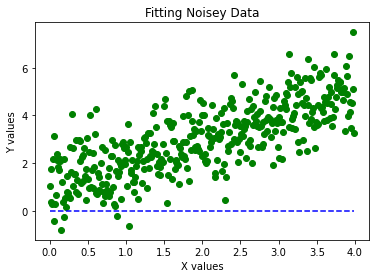

In [10]:
def prepare_the_noisy(n,m,b,r):
    x = np.arange(0,4,1.0/n)
    y = m*x + b + r*np.random.randn(len(x))
    return (x,y)

(x,y) = prepare_the_noisy(100,1,1,1)

(m,b,regression_line) = MyLinReg.linear_regression(x,y)

plt.scatter(x,y,c='g')
plt.plot(x,regression_line(x),'b--',)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Fitting Noisey Data")
plt.show()
